# ResNet50 with Softmax and SVM classifier

#Data Loading

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, GlobalMaxPooling2D, Activation
from tensorflow.keras.optimizers import Adam

In [3]:
train_dir='/content/drive/MyDrive/Vegetable_Images/train'
val_dir='/content/drive/MyDrive/Vegetable_Images/validation'
test_dir='/content/drive/MyDrive/Vegetable_Images/test'

#ResNet50 with Softmax classifier

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                  shear_range=0.2,
                  horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255,
                  shear_range=0.2,
                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


train_ds = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, seed=123, class_mode='categorical')
val_ds = valid_datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=32, seed=123, class_mode='categorical')
test_ds = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=1, seed=123, class_mode='categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [4]:
model = Sequential()
model.add(ResNet50(include_top=False,weights="imagenet"))
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(15, activation='softmax'))
model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 15)                7695      
                                                                 
Total params: 26,218,383
Trainable params: 26,165,263
Non

In [ ]:
optimizer = Adam(learning_rate=0.0002)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

hist_softmax = model.fit(
        train_ds,
        validation_data = val_ds,
        epochs = 5,
        steps_per_epoch = len(train_ds),
        validation_steps = len(val_ds))

Epoch 1/5
469/469 [==============================] - 405s 845ms/step - loss: 0.1356 - accuracy: 0.9655 - val_loss: 5.5926 - val_accuracy: 0.0703
Epoch 2/5
469/469 [==============================] - 396s 844ms/step - loss: 0.0491 - accuracy: 0.9855 - val_loss: 0.6018 - val_accuracy: 0.8133
Epoch 3/5
469/469 [==============================] - 397s 845ms/step - loss: 0.0324 - accuracy: 0.9913 - val_loss: 0.2051 - val_accuracy: 0.9617
Epoch 4/5
469/469 [==============================] - 398s 848ms/step - loss: 0.0499 - accuracy: 0.9867 - val_loss: 0.0083 - val_accuracy: 0.9980
Epoch 5/5
469/469 [==============================] - 391s 834ms/step - loss: 0.0098 - accuracy: 0.9972 - val_loss: 0.0031 - val_accuracy: 0.9990


In [ ]:
model.evaluate(test_ds)

3000/3000 [==============================] - 92s 31ms/step - loss: 0.0043 - accuracy: 0.9980


[0.0043105087243020535, 0.9980000257492065]

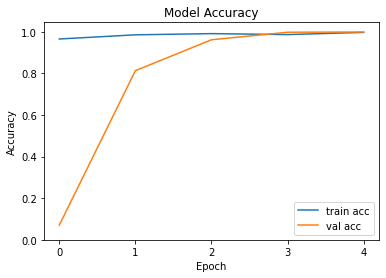

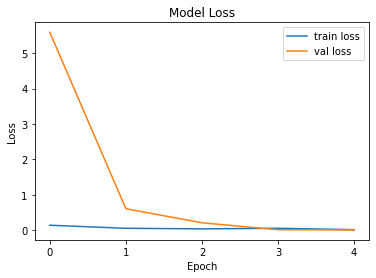

In [ ]:
def plot_history(r):
  plt.plot(r.history['accuracy'], label='train acc')
  plt.plot(r.history['val_accuracy'], label='val acc')
  plt.legend(loc='lower right')
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.xticks(np.arange(0, 5, step=1))
  plt.yticks(np.arange(0, 1.01, step=0.2))
  plt.show()
  # plt.savefig('AccVal_acc')

  plt.plot(r.history['loss'], label='train loss')
  plt.plot(r.history['val_loss'], label='val loss')
  plt.legend(loc='upper right')
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.xticks(np.arange(0, 5, step=1))
  plt.show()
  # plt.savefig('LossVal_acc')

plot_history(hist_softmax)

#ResNet50 with SVM classifier

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                  shear_range=0.2,
                  horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255,
                  shear_range=0.2,
                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


train_ds = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, seed=123, class_mode='categorical')
val_ds = valid_datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=32, seed=123, class_mode='categorical')
test_ds = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=1, seed=123, class_mode='categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [5]:
model = Sequential()
model.add(ResNet50(include_top=False,weights="imagenet"))
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(15, kernel_regularizer=l2(0.001)))
model.add(Activation('linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 15)                7695      
                                                                 
 activation (Activation)     (None, 15)                0         
                                                      

In [ ]:
model.compile(loss='squared_hinge', optimizer='adam', metrics=['accuracy'])

hist_svm = model.fit(
      train_ds,
      validation_data = val_ds,
      epochs = 5,
      steps_per_epoch = len(train_ds),
      validation_steps = len(val_ds))

Epoch 1/5
469/469 [==============================] - 5408s 12s/step - loss: 0.0828 - accuracy: 0.8817 - val_loss: 1.5227 - val_accuracy: 0.0667
Epoch 2/5
469/469 [==============================] - 285s 607ms/step - loss: 0.0262 - accuracy: 0.9677 - val_loss: 0.3255 - val_accuracy: 0.6080
Epoch 3/5
469/469 [==============================] - 283s 602ms/step - loss: 0.0185 - accuracy: 0.9765 - val_loss: 0.0434 - val_accuracy: 0.9157
Epoch 4/5
469/469 [==============================] - 283s 603ms/step - loss: 0.0132 - accuracy: 0.9824 - val_loss: 0.0549 - val_accuracy: 0.8787
Epoch 5/5
469/469 [==============================] - 282s 602ms/step - loss: 0.0265 - accuracy: 0.9530 - val_loss: 0.0138 - val_accuracy: 0.9770


In [ ]:
model.evaluate(test_ds)

3000/3000 [==============================] - 1152s 384ms/step - loss: 0.0136 - accuracy: 0.9770


[0.01358156930655241, 0.9769999980926514]

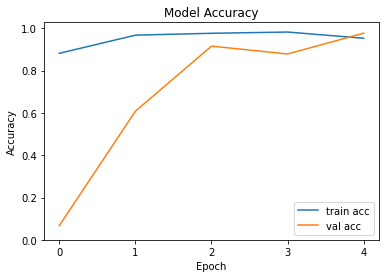

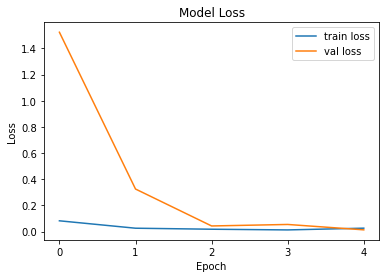

In [ ]:
plot_history(hist_svm)

# Comparison results

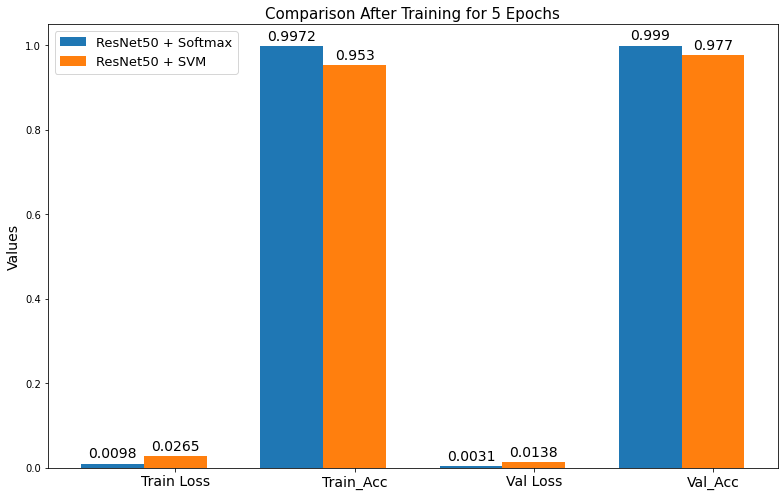

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ["Train Loss", "Train_Acc", "Val Loss", "Val_Acc"]
softmax = [0.0098, 0.9972, 0.0031, 0.9990]
svm = [0.0265, 0.9530, 0.0138, 0.9770]

x = np.arange(len(labels)) # the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots(figsize=(11, 7))
rects1 = ax.bar(x - width, softmax, width, label='ResNet50 + Softmax')
rects2 = ax.bar(x, svm, width, label='ResNet50 + SVM')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Values', fontsize=14)
ax.set_title('Comparison After Training for 5 Epochs', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=14)
ax.legend(prop={'size': 13}, loc='upper left')


def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
    xy=(rect.get_x() + rect.get_width() / 2, height),
    xytext=(0, 3), # 3 points vertical offset
    textcoords="offset points",
    ha='center', va='bottom', fontsize=14)


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

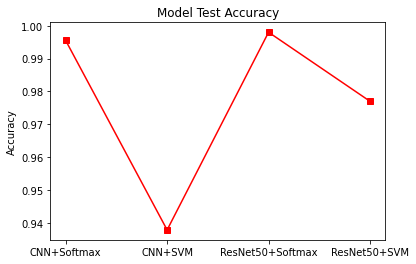

In [ ]:
accs = [0.9955, 0.9379, 0.9980, 0.9770]
plt.plot(accs, marker='s', c='red')
plt.ylabel('Accuracy')
# plt.xlabel('Model')
plt.title('Model Test Accuracy')
plt.xticks(np.arange(0, 4, step=1), ['CNN+Softmax','CNN+SVM','ResNet50+Softmax','ResNet50+SVM'])
plt.show()